<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_10%EC%9E%A5_%EB%B3%B4%EC%8A%A4%ED%86%A4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

print(train_data.shape[1])
print(test_labels.max())
print(test_labels.min())

57026/57026 [==============================] - 0s 0us/step
404
102
13
50.0
5.6


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
#print(mean)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
#print(std)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              14336     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,069,057
Trainable params: 1,067,009
Non-trainable params: 2,048
__________________________________________

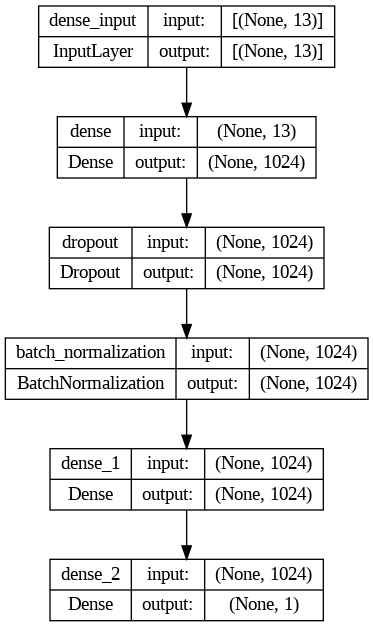

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.summary()
utils.plot_model(model, show_shapes=True)

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('boston_housing_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=1,
                    validation_split=0.2)#,
                    #callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/200
323/323 [==============================] - 12s 31ms/step - loss: 564.9850 - mae: 21.9276 - val_loss: 639.5809 - val_mae: 23.5091
Epoch 2/200
323/323 [==============================] - 4s 14ms/step - loss: 552.2800 - mae: 21.6291 - val_loss: 669.3224 - val_mae: 23.9540
Epoch 3/200
323/323 [==============================] - 5s 16ms/step - loss: 539.2349 - mae: 21.3320 - val_loss: 664.0748 - val_mae: 23.6842
Epoch 4/200
323/323 [==============================] - 4s 14ms/step - loss: 526.8334 - mae: 21.0371 - val_loss: 653.5896 - val_mae: 23.4746
Epoch 5/200
323/323 [==============================] - 4s 14ms/step - loss: 514.1694 - mae: 20.7398 - val_loss: 632.2267 - val_mae: 23.0070
Epoch 6/200
323/323 [==============================] - 5s 16ms/step - loss: 502.2745 - mae: 20.4456 - val_loss: 637.7739 - val_mae: 23.1253
Epoch 7/200
323/323 [==============================] - 4s 13ms/step - loss: 490.3631 - mae: 20.1522 - val_loss: 622.3599 - val_mae: 22.7587
Epoch 8/200
323/323

<ipython-input-6-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


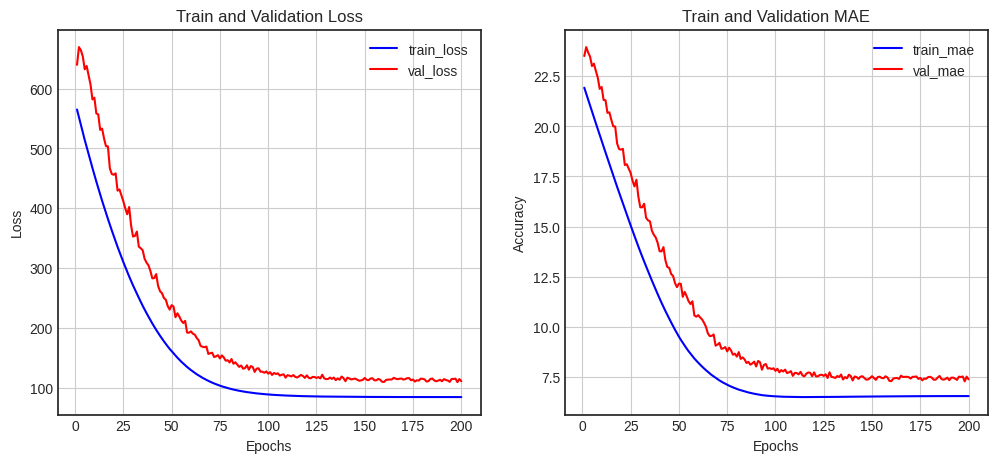

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse, test_mae = model.evaluate(test_data, test_labels)
print('Test Mean Squared Error:', test_mse)
print('Test Mean Absolute Error:', test_mae)

4/4 [==============================] - 0s 8ms/step - loss: 110.3902 - mae: 7.5968
Test Mean Squared Error: 110.39020538330078
Test Mean Absolute Error: 7.59678840637207
